In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("data.csv") # ROTATION IN RADS
df["Rotation"] = np.degrees(df["Rotation"])
trial_schedule = pd.read_csv("tgt.csv")

df.head()

,Trial,Mouse X,Mouse Y,Cursor X,Cursor Y,Rotation
0,0,1.0,-3.0,0.94749,-3.016995,-1.0
1,0,1.0,-3.0,0.94749,-3.016995,-1.0
2,0,1.0,-3.0,0.94749,-3.016995,-1.0
3,0,1.0,-3.0,0.94749,-3.016995,-1.0
4,0,1.0,-3.0,0.94749,-3.016995,-1.0


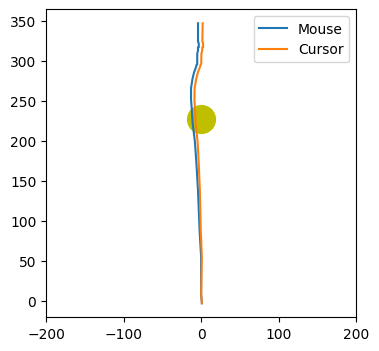

In [24]:
target_loc_x, target_loc_y = (0, 3.78*60)

trial_min = 0
trial_max = 0
df_head = df[df["Trial"].between(trial_min, trial_max)]


for trial, trial_data in df_head.groupby("Trial"):
    plt.figure(figsize=(4, 4))
    plt.plot(trial_data["Mouse X"], trial_data["Mouse Y"], label=f"Mouse")
    plt.plot(trial_data["Cursor X"], trial_data["Cursor Y"], label=f"Cursor")
    plt.scatter(target_loc_x, target_loc_y, s=400, color='y')

    plt.xlim([-200, 200])
    plt.legend()
    plt.show()

In [25]:
# Compute start and end positions for each trial
df_grouped = df.groupby("Trial")[["Cursor X", "Cursor Y"]].agg(["first", "last"])
df_grouped["Rotation"] = df.groupby("Trial")["Rotation"].agg("first")

df_grouped["Delta X"] = df_grouped[("Cursor X", "last")] - df_grouped[("Cursor X", "first")]
df_grouped["Delta Y"] = df_grouped[("Cursor Y", "last")] - df_grouped[("Cursor Y", "first")]

df_grouped["Cursor Angle"] = np.degrees(-np.arctan2(df_grouped["Delta X"], df_grouped["Delta Y"]))  # atan2(x, y)


df_grouped.head()

Cursor X             Cursor Y             Rotation    Delta X  \
          first       last     first        last                       
Trial                                                                  
0      0.947490   2.056594 -3.016995  347.016960     -1.0   1.109104   
1      0.000000  28.000000 -3.000000  382.000000      0.0  28.000000   
2     -1.000000  -4.000000 -2.000000  331.000000      0.0  -3.000000   
3      0.104714 -19.158720 -5.999086  352.719355      1.0 -19.263434   
4     -2.000000  29.000000  1.000000  324.000000      0.0  31.000000   

          Delta Y Cursor Angle  
                                
Trial                           
0      350.033955    -0.181545  
1      385.000000    -4.159642  
2      333.000000     0.516164  
3      358.718441     3.073871  
4      323.000000    -5.482184

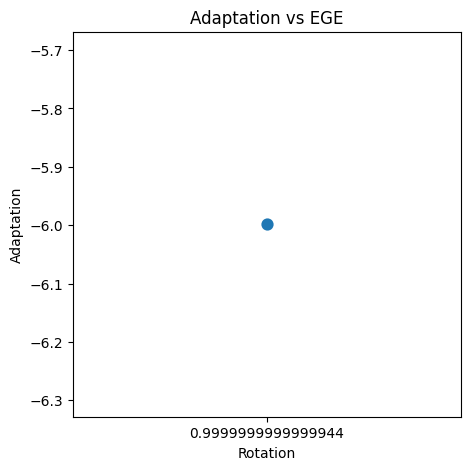

In [26]:
pert_idx = (df_grouped["Rotation"] != 0).to_numpy().nonzero()[0]
valid_idx = pert_idx[(pert_idx > 0) & (pert_idx < len(df_grouped) - 1)]
adapt_index = df_grouped["Cursor Angle"].iloc[valid_idx + 1].reset_index(drop=True) - df_grouped["Cursor Angle"].iloc[valid_idx - 1].reset_index(drop=True)

# adapt_index
adapt_index = pd.DataFrame({
    "Adaptation": adapt_index,
    "Rotation": df_grouped["Rotation"].iloc[valid_idx].reset_index(drop=True)
    })


plt.figure(figsize=(5,5))
sns.pointplot(
    data=adapt_index,
    x="Rotation",
    y="Adaptation",
    errorbar=('ci', 95)
)

plt.title("Adaptation vs EGE")
plt.show()